In [1]:
! module load cudatoolkit/11.7
! module load cudnn/8.9.1_cuda11

In [2]:
import numpy  as np
import healpy as hp
import matplotlib.pyplot as plt
import sys
#
sys.path.append('../sht')
from sht import DirectSHT
#
%load_ext autoreload
%autoreload 2

JAX not found. Falling back to NumPy.
JAX not found. Falling back to NumPy.
JAX not found. Falling back to NumPy.


In [3]:
# We can very quickly calculate Ylm values. As an example, compute them up to lmax=Nl
Nl = 600
Nx = 1800
#
sht= DirectSHT(Nl,Nx)

In [4]:
# Put a sequence of points on the equator
phis   = np.linspace(0,2*np.pi,10)
thetas = np.ones_like(phis)*np.pi/2
wts    = np.ones_like(phis)
#
# And some along the meridian -- avoiding high |x|.
new_thetas = (np.arange(6)+1.5)/8. * np.pi
thetas = np.append(thetas,new_thetas)
phis   = np.append(phis,np.zeros_like(new_thetas))
wts    = np.append(wts,np.ones_like(new_thetas))

In [5]:
alms = sht(thetas,phis,wts)

Sorting took  2.9087066650390625e-05  seconds.
Digitizing took  0.0007996559143066406  seconds.
Precomputing vs took  8.67670726776123  seconds.
Computing alm's took  3.9419798851013184  seconds.
Sorting took  4.792213439941406e-05  seconds.
Digitizing took  0.00048041343688964844  seconds.
Precomputing vs took  6.998187780380249  seconds.
Computing alm's took  3.55605411529541  seconds.


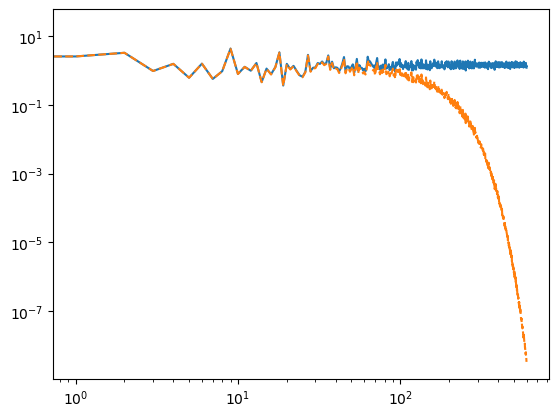

In [6]:
# Let's convolve the alms with a beam 
alms_smooth = hp.sphtfunc.smoothalm(alms,fwhm=np.pi/180,pol=False,inplace=False)
plt.loglog(hp.alm2cl(alms))
plt.loglog(hp.alm2cl(alms_smooth), ls='--')

0.0 180.0 -180.0 180.0


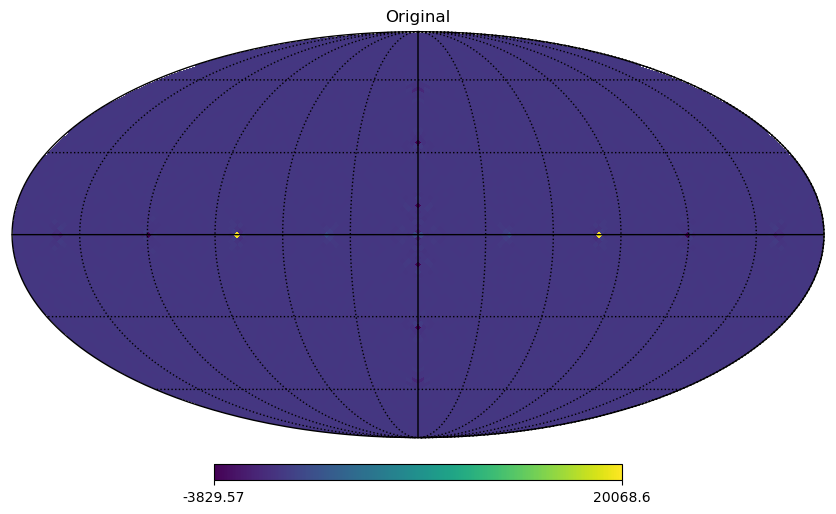

0.0 180.0 -180.0 180.0


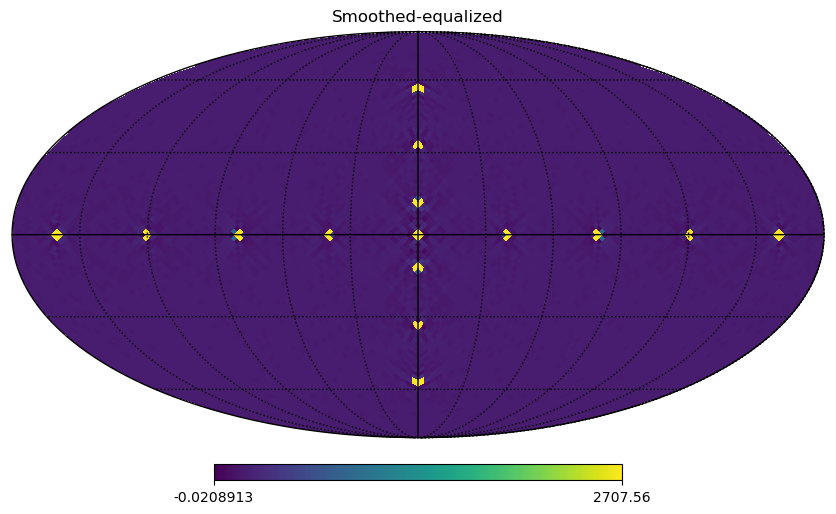

In [7]:
nside = 32
#
hp.mollview(hp.alm2map(alms, nside), title='Original')
hp.graticule()
plt.show()
hp.mollview(hp.alm2map(alms_smooth, nside),norm='hist', title='Smoothed-equalized')
hp.graticule()
plt.show()

## A single point source.

Let's look at a single source.

Sorting took  1.8596649169921875e-05  seconds.
Digitizing took  0.0004916191101074219  seconds.
Precomputing vs took  7.351202011108398  seconds.
Computing alm's took  3.33734130859375  seconds.


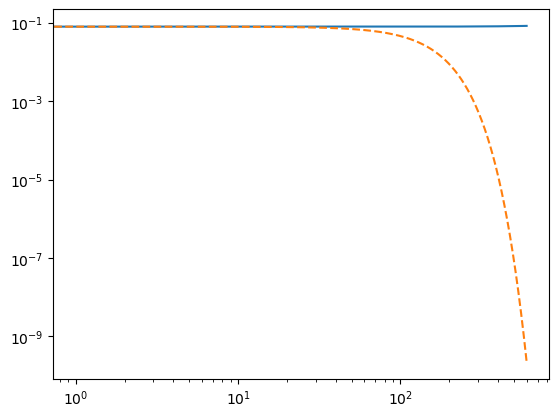

In [8]:
# Look at a single point.
phis   = np.array([np.pi/4.0])
thetas = np.ones_like(phis)*3*np.pi/8
wts    = np.ones_like(thetas)
#
alms = sht(thetas,phis,wts)
alms_smooth = hp.sphtfunc.smoothalm(alms,fwhm=np.pi/180,pol=False,inplace=False)
#
plt.loglog(hp.alm2cl(alms))
plt.loglog(hp.alm2cl(alms_smooth), ls='--')

0.0 180.0 -180.0 180.0


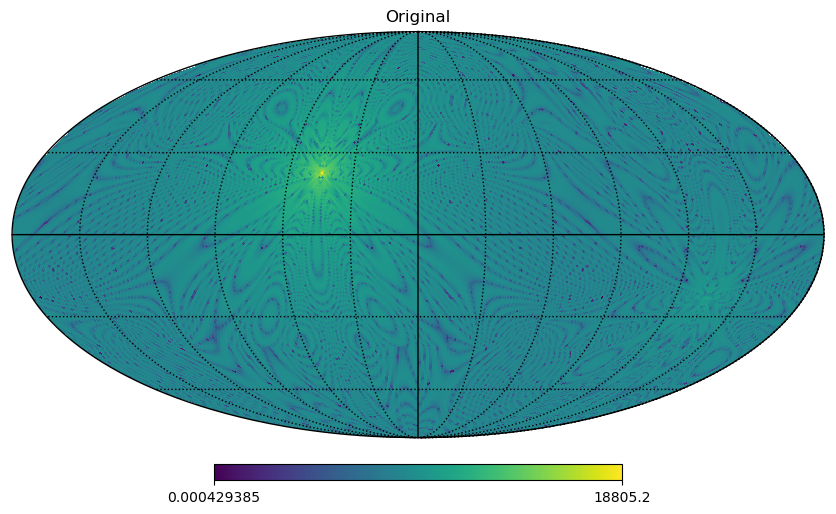

0.0 180.0 -180.0 180.0


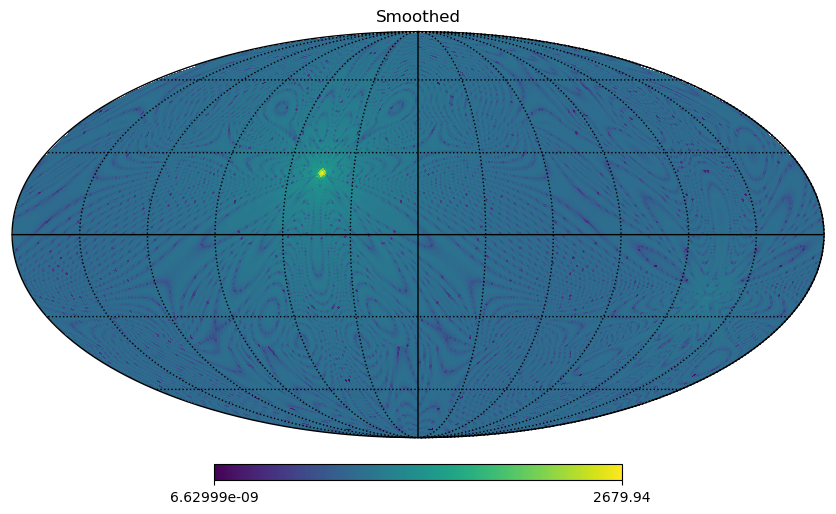

0.0 180.0 -180.0 180.0


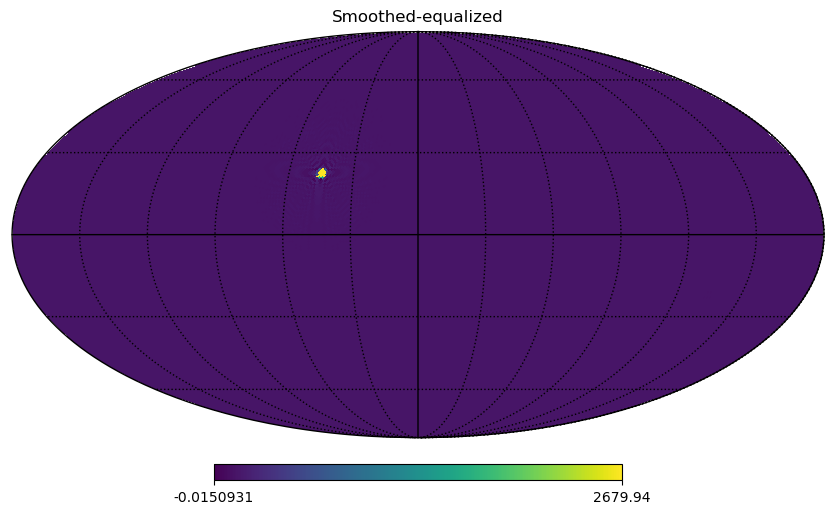

In [9]:
nside = 64
#
hp.mollview(np.abs(hp.alm2map(alms, nside)),norm='log', title='Original')
hp.graticule()
plt.show()
hp.mollview(np.abs(hp.alm2map(alms_smooth, nside)),norm='log', title='Smoothed')
hp.graticule()
plt.show()
hp.mollview(hp.alm2map(alms_smooth, nside),norm='hist', title='Smoothed-equalized')
hp.graticule()
plt.show()

## Sampling from a uniform density.

In [10]:
rng = np.random.default_rng()

Sorting took  0.04427361488342285  seconds.
Digitizing took  0.0034224987030029297  seconds.
Precomputing vs took  15.426339149475098  seconds.
Computing alm's took  3.5833888053894043  seconds.
Sorting took  0.04334592819213867  seconds.
Digitizing took  0.003416299819946289  seconds.
Precomputing vs took  15.007796287536621  seconds.
Computing alm's took  3.4524381160736084  seconds.


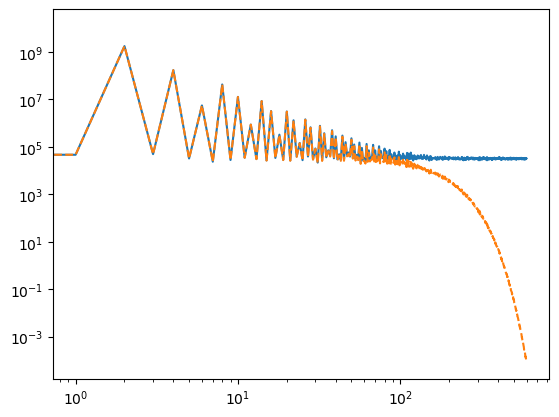

In [11]:
# Look at points drawn at random from a uniform density
# between DEC=-30 and DEC=+30.
Npnt      = 400000
cmin,cmax = np.sin(np.radians(-30)),np.sin(np.radians(30.))
theta     = np.arccos(rng.uniform(low=cmin,high=cmax,size=Npnt))
phi       = rng.uniform(low=0.0,high=2*np.pi,size=Npnt)
wt        = np.ones(Npnt)
#
alms = sht(theta,phi,wt)
alms_smooth = hp.sphtfunc.smoothalm(alms,fwhm=np.pi/180,pol=False,inplace=False)
#
plt.loglog(hp.alm2cl(alms))
plt.loglog(hp.alm2cl(alms_smooth), ls='--')

0.0 180.0 -180.0 180.0


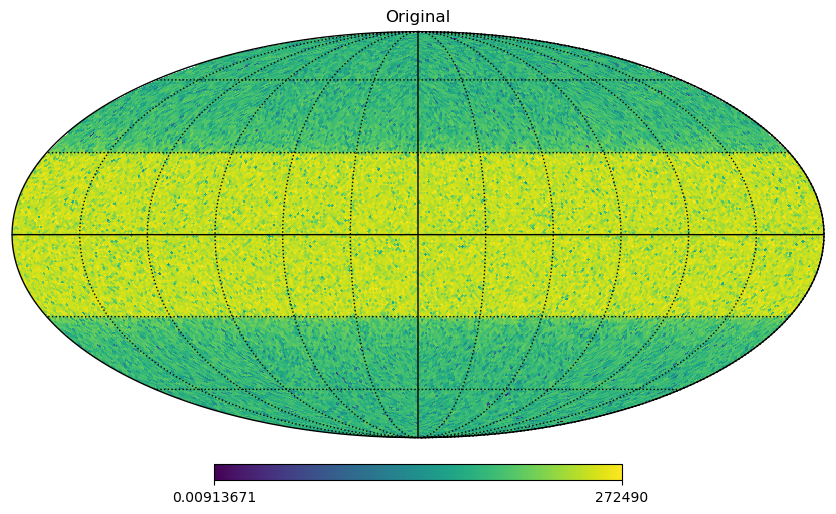

0.0 180.0 -180.0 180.0


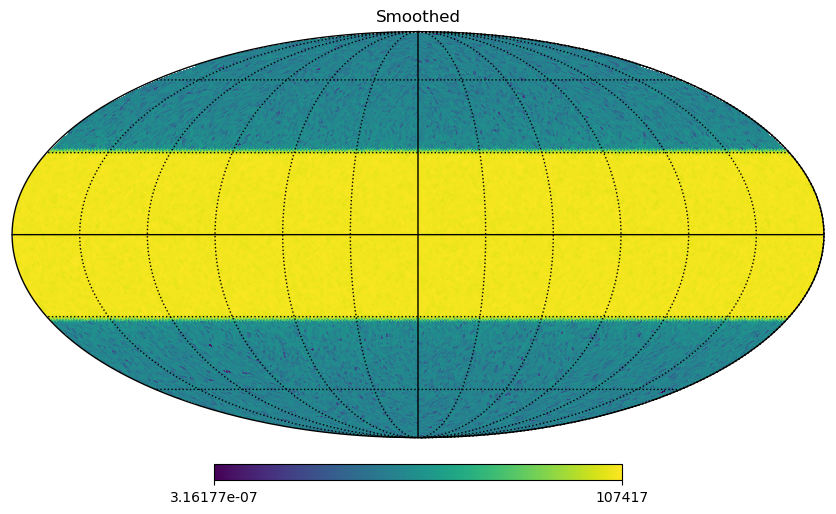

0.0 180.0 -180.0 180.0


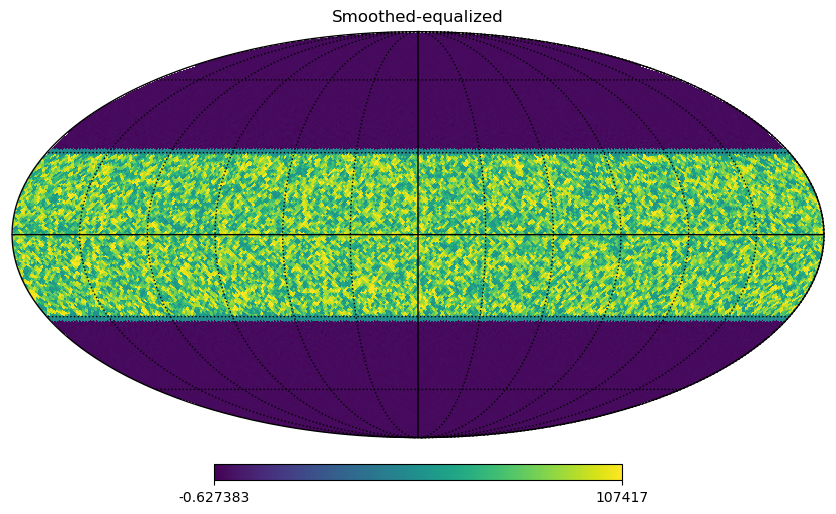

In [12]:
nside = 64
#
hp.mollview(np.abs(hp.alm2map(alms, nside)),norm='log', title='Original')
hp.graticule()
plt.show()
hp.mollview(np.abs(hp.alm2map(alms_smooth, nside)),norm='log', title='Smoothed')
hp.graticule()
plt.show()
hp.mollview(hp.alm2map(alms_smooth, nside),norm='hist', title='Smoothed-equalized')
hp.graticule()
plt.show()

# The End